<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Implementation" data-toc-modified-id="Implementation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Implementation</a></span></li></ul></li><li><span><a href="#Experiment" data-toc-modified-id="Experiment-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Experiment</a></span><ul class="toc-item"><li><span><a href="#sigmoid-function" data-toc-modified-id="sigmoid-function-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>sigmoid function</a></span></li><li><span><a href="#Binary-classification" data-toc-modified-id="Binary-classification-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Binary classification</a></span><ul class="toc-item"><li><span><a href="#Data-generation" data-toc-modified-id="Data-generation-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Data generation</a></span></li><li><span><a href="#Regression" data-toc-modified-id="Regression-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Regression</a></span></li><li><span><a href="#Accuracy" data-toc-modified-id="Accuracy-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Accuracy</a></span></li></ul></li><li><span><a href="#Multi-class-classification" data-toc-modified-id="Multi-class-classification-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Multi-class classification</a></span><ul class="toc-item"><li><span><a href="#Three-classes" data-toc-modified-id="Three-classes-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Three classes</a></span></li><li><span><a href="#Sandwich-problem" data-toc-modified-id="Sandwich-problem-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Sandwich problem</a></span></li><li><span><a href="#Four-classes-problem" data-toc-modified-id="Four-classes-problem-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Four classes problem</a></span></li><li><span><a href="#XOR-problem" data-toc-modified-id="XOR-problem-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>XOR problem</a></span></li></ul></li><li><span><a href="#Discussion" data-toc-modified-id="Discussion-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Discussion</a></span><ul class="toc-item"><li><span><a href="#sigmoid-and-softmax-comparison-in-2-classes-probelm" data-toc-modified-id="sigmoid-and-softmax-comparison-in-2-classes-probelm-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>sigmoid and softmax comparison in 2 classes probelm</a></span></li><li><span><a href="#Gradient-decent-coef-property" data-toc-modified-id="Gradient-decent-coef-property-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Gradient decent coef property</a></span></li></ul></li></ul></li><li><span><a href="#Benchmark-and-test" data-toc-modified-id="Benchmark-and-test-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Benchmark and test</a></span><ul class="toc-item"><li><span><a href="#Test" data-toc-modified-id="Test-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Test</a></span><ul class="toc-item"><li><span><a href="#sigmoid" data-toc-modified-id="sigmoid-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>sigmoid</a></span></li><li><span><a href="#softmax" data-toc-modified-id="softmax-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>softmax</a></span></li></ul></li><li><span><a href="#benchmark" data-toc-modified-id="benchmark-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>benchmark</a></span><ul class="toc-item"><li><span><a href="#sigmoid-and-softmax-for-binary-problem" data-toc-modified-id="sigmoid-and-softmax-for-binary-problem-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>sigmoid and softmax for binary problem</a></span></li></ul></li></ul></li></ul></div>

# Logistic Regression

## Implementation

In [1]:
import os
os.sys.path.append("..")


from klslearn.models import LogisticRegressor
from klslearn.models.logistic_regression import LogisticRegressor
from klslearn.models.logistic_regression import sigmoid
from klslearn.models.logistic_regression import softmax
from klslearn.datasets import generate_scatter_labeled as generate
from klslearn.datasets import plot_scatter_2D_labeled as plot2d

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Experiment

## sigmoid function

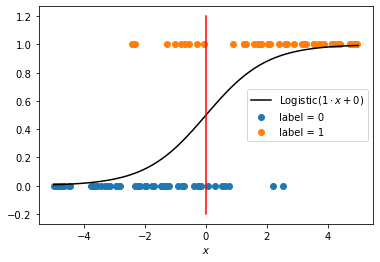

In [2]:
def plot_sigmoid():

    x = np.random.rand(100) * 10 - 5
    rnd = np.random.rand(100)
    acc = sigmoid(x)
    y = np.where(rnd < acc, 1, 0)
    plt.figure()
    plt.plot(np.linspace(-5, 5, 100),
             sigmoid(np.linspace(-5, 5, 100)),
             color="black",
             label="$\\mathrm{Logistic}(1\\cdot x + 0)$")
    plt.scatter(x[y == 0], y[y == 0], label="label = 0")
    plt.scatter(x[y == 1], y[y == 1], label="label = 1")
    plt.plot([0, 0], [-0.2, 1.2], color='red')
    plt.xlabel("$x$")
    plt.legend()
    plt.show()


plot_sigmoid()

## Binary classification

### Data generation

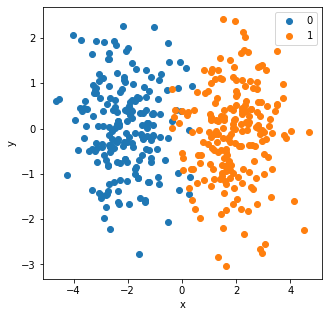

In [3]:
plot2d(*generate(center=[[-2,0],[2,0]]))

### Regression

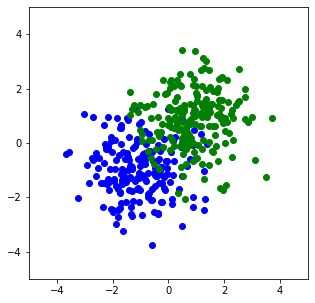

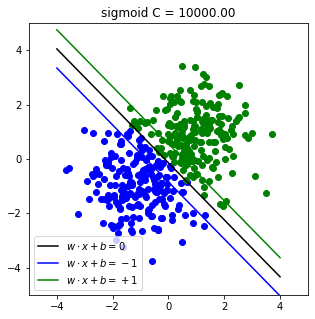

In [4]:
def plot_reg(lr, plot_gen = False):
    
    X, y=generate(center=[[-1,-1],[1,1]])
    
    if plot_gen:
        
        plt.figure(figsize=(5,5))
        plt.xlim((-5,5))
        plt.ylim((-5,5))
        plt.scatter(X[y==0,0], X[y==0,1],color="blue")
        plt.scatter(X[y==1,0], X[y==1,1],color="green")
        plt.show()

    lr.fit(X,y)
    yhat=lr.predict(X)
    
    
    plt.figure(figsize=(5,5))
    plt.xlim((-5,5))
    plt.ylim((-5,5))
    
    plt.scatter(X[yhat==0,0], X[yhat==0,1],color="blue")
    plt.scatter(X[yhat==1,0], X[yhat==1,1],color="green")
    
    x_plt=np.linspace(-4,4,10)
    y_plt=(x_plt*lr.coef_[0,0]+lr.intercept_[0])/(-lr.coef_[0,1])
    plt.plot(x_plt, y_plt, color="black", label="$w\\cdot x+b=0$")
        
    
    if lr.sigmoid_:
        
        x_plt=np.linspace(-4,4,10)
        y_plt=(x_plt*lr.coef_[0,0]+lr.intercept_[0] + 1)/(-lr.coef_[0,1])
        plt.plot(x_plt, y_plt,"blue", label="$w\\cdot x+b=-1$")

        x_plt=np.linspace(-4,4,10)
        y_plt=(x_plt*lr.coef_[0,0]+lr.intercept_[0] - 1)/(-lr.coef_[0,1])
        plt.plot(x_plt, y_plt,"green", label="$w\\cdot x+b=+1$")
        plt.legend()
    else:
        x_plt=np.linspace(-4,4,10)
        y_plt=(x_plt*(lr.coef_[0,0]-lr.coef_[1,0])+(lr.intercept_[0]-lr.intercept_[1]) + 1)/(-lr.coef_[0,1]+lr.coef_[1,1])
        plt.plot(x_plt, y_plt,"blue")

        x_plt=np.linspace(-4,4,10)
        y_plt=(x_plt*(lr.coef_[0,0]-lr.coef_[1,0])+(lr.intercept_[0]-lr.intercept_[1]) - 1)/(-lr.coef_[0,1]+lr.coef_[1,1])
        plt.plot(x_plt, y_plt,"green")
        
    
    if lr.sigmoid_:
        plt.title(("sigmoid C = %.2f"%lr.C))
    else:
        plt.title(("softmax C = %.2f"%lr.C))
        

    plt.show()

    #print(lr.coef_)
    #print(lr.intercept_)


def plot_gc(X, ys):
    fig, axes = plt.subplots(1, len(ys), figsize=(4*len(ys), 4))
    for i in range(len(ys)):
        plot2d(X, ys[i], ax=axes[i])
        axes[i].set_title("Generated" if i == 0 else ("Classified" if i == 1 else "Classified2"))
    plt.show()


plot_reg(LogisticRegressor(C=10000),plot_gen=True)

### Accuracy

linear accuracy: 0.915
rbf kernel accuracy: 0.915


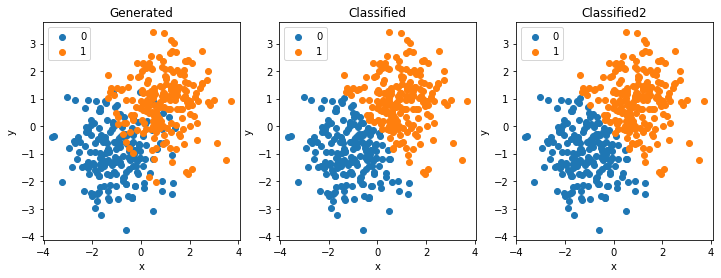

In [5]:
X, y = generate([[-1, -1], [1, 1]], n=200)

nbs = LogisticRegressor()
nbs.fit(X, y)
yhat = nbs.predict(X)

nbs = LogisticRegressor(kernel="rbf")
nbs.fit(X, y)
yhat2 = nbs.predict(X)

print("linear accuracy:", np.sum(yhat == y) / y.shape[0])
print("rbf kernel accuracy:", np.sum(yhat2 == y) / y.shape[0])
plot_gc(X, [y, yhat, yhat2])

## Multi-class classification

### Three classes

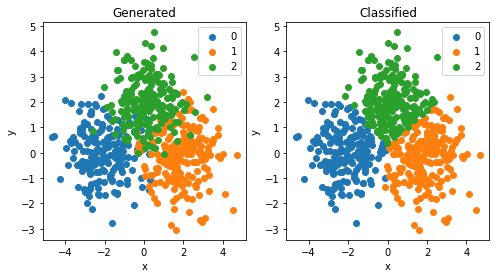

In [6]:
X, y = generate([[-2, 0], [2, 0], [0, 2]], n=200)
lr = LogisticRegressor()
lr.fit(X, y)
yhat = lr.predict(X)

plot_gc(X, [y, yhat])

### Sandwich problem

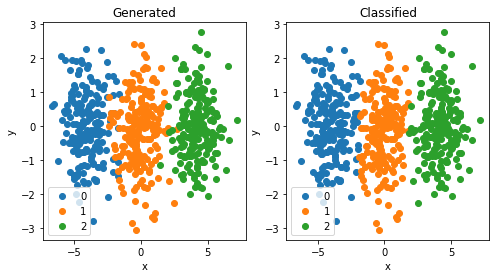

In [7]:
X, y = generate([[-4, 0], [0, 0], [4, 0]])
lr = LogisticRegressor()
lr.fit(X, y)
yhat = lr.predict(X)


plot_gc(X, [y, yhat])

### Four classes problem

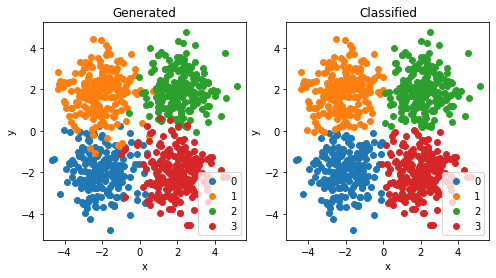

In [8]:
X,y=generate([[-2,-2],[-2,2],[2,2],[2,-2]])

lr=LogisticRegressor()
lr.fit(X,y)
yhat=lr.predict(X)

plot_gc(X, [y, yhat])

### XOR problem


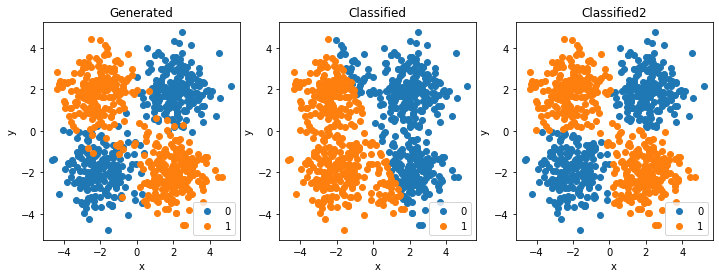

In [9]:
X,y=generate([[-2,-2],[-2,2],[2,2],[2,-2]])
y[y==2]=0
y[y==3]=1

lr=LogisticRegressor()
lr.fit(X,y)
yhat=lr.predict(X)

lr=LogisticRegressor(kernel="rbf")
lr.fit(X,y)
yhat2=lr.predict(X)

plot_gc(X, [y, yhat, yhat2])

## Discussion

### sigmoid and softmax comparison in 2 classes probelm
sigmoid is equal to assign two weights $w_1$, $w_2$ for two labels, (each weight is a vector) and set regularization term for sigmoid $\lambda_1 (w_1-w_2)^2$ where $\lambda_1=1/C_1$

Regularization term for softmax $\lambda_2 (w_1^2+w_2)^2 = 1/2 \lambda_2[(w_1-w_2)^2+(w_1+w_2)^2]$ where $\lambda_2=1/C_2$

$w_1+w_2$ has no effect on cross-entropy. We can sperate the loss as two indepent parts:
`cross-entropy` $ + 1/2 \lambda_2[(w_1-w_2)^2$ and $1/2 \lambda_2 (w_1+w_2)^2$. We have two conclusions:

1. After optimization $w_1 + w_2$ would be zero.
2. softmax will be equal to sigmoid, if $\lambda_1=1/2\lambda_2$ or $C_1=2C_2$


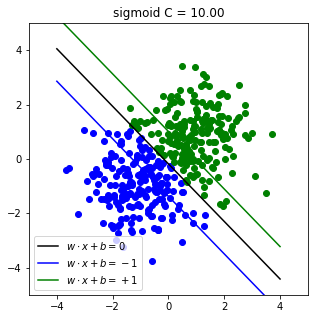

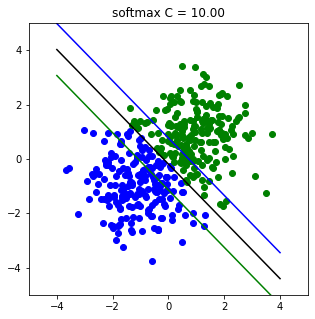

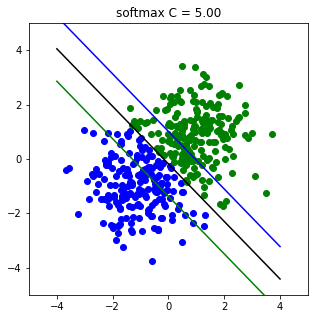

ceof
sigmoid C=10.00 [0.88696205 0.83776449]
softmax C=10.00 [1.10157476 1.04565168]
softmax C=05.00 [0.88696165 0.83776418]


In [10]:
X, y = generate([[-2, 0], [+2, 0]])

lr1 = LogisticRegressor(sigmoid=True, C=10, max_iter=1000)
plot_reg(lr1)

lr2 = LogisticRegressor(sigmoid=False, C=10, max_iter=1000)
plot_reg(lr2)

lr3 = LogisticRegressor(sigmoid=False, C=5, max_iter=1000)
plot_reg(lr3)

print("ceof")
print("sigmoid C=%05.2f" % lr1.C, lr1.coef_.reshape(-1))
print("softmax C=%05.2f" % lr2.C, lr2.coef_[1] - lr2.coef_[0])
print("softmax C=%05.2f" % lr3.C, lr3.coef_[1] - lr3.coef_[0])

### Gradient decent coef property

In [11]:
X,y=generate([[-2,-2],[-2,2],[2,2],[2,-2]])
lr=LogisticRegressor()
lr.fit(X,y)

print("sum of coef is zero")
print(lr.coef_.sum(axis=0))
print("sum of intercept is zero")
print(lr.intercept_.sum())

sum of coef is zero
[-1.11022302e-16 -6.66133815e-16]
sum of intercept is zero
0.0


# Benchmark and test

## Test 

### sigmoid

No overflow problem for large input.

In [12]:
# no overflow problem
assert sigmoid(np.array([1E100])) == 1
assert sigmoid(np.array([-1E100])) == 0

we have some problems with np.inf

In [13]:
print(sigmoid(np.array([-1E100,-1,0,1,1E100,np.inf])))

[0.         0.26894142 0.5        0.73105858 1.                nan]


..\klslearn\models\logistic_regression.py:7: RuntimeWarning: invalid value encountered in subtract
  z_ = z - max_


### softmax
similar to sigmoid

In [14]:
print(softmax(np.array([[1,1],[0,1],[1E-100,0],[1E+100,0],[-1E+100,0]])))
print(softmax(np.array([[np.inf,0]])))

[[0.5        0.5       ]
 [0.26894142 0.73105858]
 [0.5        0.5       ]
 [1.         0.        ]
 [0.         1.        ]]
[[nan nan]]


..\klslearn\models\logistic_regression.py:16: RuntimeWarning: invalid value encountered in subtract
  z = z - maxz


## benchmark

### sigmoid and softmax for binary problem

In [ ]:
X,y=generate([[-2,0],[2,0]], n=200)
print("softmax")
%timeit LogisticRegressor(sigmoid=False).fit(X,y)
print("sigmoid")
%timeit LogisticRegressor(sigmoid=True).fit(X,y)

softmax
20.4 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
sigmoid
